In [3]:
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [4]:
import os
import shutil

directory_list = [
    './datasets/train/',
    './datasets/test/'
]

for dir in directory_list:
    os.makedirs(dir)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './datasets/train/'

In [5]:
# 구글에서 연애인 사진 불러오기

from bing_image_downloader.bing_image_downloader import downloader

downloader.download(query='마동석', limit=50, output_dir='./',adult_filter_off=True,force_replace=False,timeout=60)
downloader.download(query='카리나', limit=50, output_dir='./',adult_filter_off=True,force_replace=False,timeout=60)
downloader.download(query='이수지', limit=50, output_dir='./',adult_filter_off=True,force_replace=False,timeout=60)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://image.xportsnews.com/contents/images/upload/article/2022/1128/1669621507974521.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2022/10/20/30000798339_1280.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://cdn.movietok.kr/news/photo/202212/12978_17366_5142.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://www.sportsw.kr/news/data/20230601/p1065555127941654_720_thum.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2022/11/17/30000804359_1280.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://image.xportsnews.com/contents/images/upload/article/2018/0402/1522647847731706.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://cdn.sports.hankooki.com/news/photo/202305/6829615_1025770_818.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/05/14/5tjArQ2TYQ7Y636934517816837543.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://

KeyboardInterrupt: 

In [ ]:
def dataset_split(query, train_cnt):   # 카리나, 30개 train 폴더에 넣기  ,   query: 질문/요청
    for dir in directory_list:         # dir - './datasets/train/카리나'
        if not os.path.isdir(dir + query):
            os.makedirs(dir + query)
    cnt = 0

    for file_name in os.listdir(query):
        if cnt < train_cnt:
            shutil.move(query + "/" + file_name, './datasets/train/' + query + '/' + file_name)  # 폴더에 있는 사진을 다른 폴더에 옮기는 작업
        else:
            shutil.move(query + "/" + file_name, './datasets/test/' + query + '/' + file_name)   # 폴더에 있는 사진을 다른 폴더에 옮기는 작업

        cnt += 1
    
    shutil.rmtree(query)  # 폴더에 있는 파일이 다 옮겨져서 파일이 비면 그 폴더를 삭제하는 것

dataset_split('카리나', 40)
dataset_split('마동석', 40)
dataset_split('이수지', 40)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

In [ ]:
trainsforms_train = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.5), 
        transforms.ToTensor(),  # tensor로 변환
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])  # 평균, 표준편차
    ]
)

trainsforms_test = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),  # tensor로 변환
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])  # 평균, 표준편차
    ]
)

train_datasets = datasets.ImageFolder(root='./datasets/train', transform=trainsforms_train)
test_datasets = datasets.ImageFolder(root='./datasets/test', transform=trainsforms_test)

In [4]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 120
    Root location: ./datasets/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [5]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True)

In [6]:
next(iter(train_dataloader))

[tensor([[[[ 1.9578,  1.9749,  1.9920,  ...,  1.9920,  2.0092,  2.0263],
           [ 1.9578,  1.9749,  1.9749,  ...,  1.9920,  2.0092,  2.0263],
           [ 1.9578,  1.9749,  1.9749,  ...,  1.9920,  2.0092,  2.0263],
           ...,
           [ 1.3927,  1.1529,  0.8618,  ...,  2.1119,  2.1119,  2.1119],
           [ 1.4098,  1.3755,  1.2728,  ...,  2.0948,  2.0948,  2.1119],
           [ 1.1872,  1.1700,  1.1872,  ...,  2.0948,  2.0948,  2.0948]],
 
          [[ 0.6254,  0.6078,  0.6254,  ...,  0.6604,  0.6779,  0.6954],
           [ 0.6254,  0.6254,  0.6254,  ...,  0.6604,  0.6779,  0.6954],
           [ 0.6254,  0.6254,  0.6254,  ...,  0.6604,  0.6779,  0.6954],
           ...,
           [ 1.5532,  1.3081,  1.0105,  ...,  0.6779,  0.6779,  0.6779],
           [ 1.5532,  1.5007,  1.3782,  ...,  0.6604,  0.6604,  0.6779],
           [ 1.1506,  1.0805,  1.0455,  ...,  0.6604,  0.6604,  0.6604]],
 
          [[ 0.5834,  0.5834,  0.6008,  ...,  0.6182,  0.6008,  0.5834],
           [ 

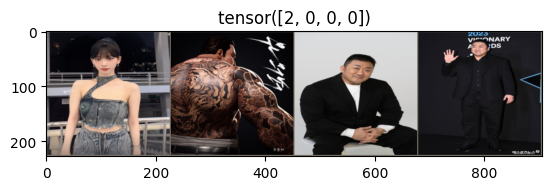

In [9]:
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.numpy().transpose([1,2,0]) 

    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229,0.224,0.225])

    img = std * img + mean
    img = np.clip(img,0,1)

    plt.imshow(img)
    plt.title(title)
    plt.show()

images,labels = next(iter(train_dataloader))
images_data = torchvision.utils.make_grid(images)

imshow(images_data,labels)

In [ ]:
train_datasets.classes  # "마동석" = 0,  "이수지" = 1  "카리나" = 2

['마동석', '이수지', '카리나']

In [ ]:
train_datasets.imgs

[('./datasets/train\\마동석\\image_1.jpg', 0),
 ('./datasets/train\\마동석\\image_10.jpg', 0),
 ('./datasets/train\\마동석\\image_11.jpg', 0),
 ('./datasets/train\\마동석\\image_12.jpg', 0),
 ('./datasets/train\\마동석\\image_13.jpg', 0),
 ('./datasets/train\\마동석\\image_14.jpg', 0),
 ('./datasets/train\\마동석\\image_15.jpg', 0),
 ('./datasets/train\\마동석\\image_16.jpg', 0),
 ('./datasets/train\\마동석\\image_17.jpg', 0),
 ('./datasets/train\\마동석\\image_18.jpg', 0),
 ('./datasets/train\\마동석\\image_19.jpg', 0),
 ('./datasets/train\\마동석\\image_2.jpg', 0),
 ('./datasets/train\\마동석\\image_20.jpg', 0),
 ('./datasets/train\\마동석\\image_21.jpg', 0),
 ('./datasets/train\\마동석\\image_22.jpg', 0),
 ('./datasets/train\\마동석\\image_23.jpg', 0),
 ('./datasets/train\\마동석\\image_24.jpg', 0),
 ('./datasets/train\\마동석\\image_25.jpg', 0),
 ('./datasets/train\\마동석\\image_26.jpg', 0),
 ('./datasets/train\\마동석\\image_27.jpg', 0),
 ('./datasets/train\\마동석\\image_28.jpg', 0),
 ('./datasets/train\\마동석\\image_29.jpg', 0),
 ('./dataset

In [12]:
model = models.resnet34(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(in_features=512, out_features=3, bias=True)

c:\POTENUP\08_Deep_Learning_Analysis_Study\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\POTENUP\08_Deep_Learning_Analysis_Study\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
from tensorboardX import SummaryWriter
import tqdm

writer = SummaryWriter()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion  = nn.CrossEntropyLoss()
epochs = 50
step = 0

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

for epoch in range(epochs):
    for data,labels in tqdm.tqdm(train_dataloader):
        optimizer.zero_grad()
        pred = model(data.to(device))
        loss = criterion(pred,labels.to(device))
        writer.add_scalar('Loss/train',loss.item(),step)
        loss.backward()
        optimizer.step()
        step += 1

    print('loss',loss.item())

100%|██████████| 30/30 [00:04<00:00,  6.19it/s]


loss 0.014999527484178543


100%|██████████| 30/30 [00:04<00:00,  7.23it/s]


loss 0.022956952452659607


100%|██████████| 30/30 [00:04<00:00,  7.29it/s]


loss 0.017302609980106354


100%|██████████| 30/30 [00:04<00:00,  7.50it/s]


loss 0.04361196607351303


100%|██████████| 30/30 [00:04<00:00,  7.05it/s]


loss 0.021468263119459152


100%|██████████| 30/30 [00:03<00:00,  7.56it/s]


loss 0.01305457018315792


100%|██████████| 30/30 [00:04<00:00,  7.34it/s]


loss 0.005807678215205669


100%|██████████| 30/30 [00:04<00:00,  7.18it/s]


loss 0.0033832374028861523


100%|██████████| 30/30 [00:04<00:00,  7.31it/s]


loss 0.014643479138612747


100%|██████████| 30/30 [00:04<00:00,  7.45it/s]


loss 0.05358795449137688


100%|██████████| 30/30 [00:04<00:00,  7.39it/s]


loss 0.014895567670464516


100%|██████████| 30/30 [00:04<00:00,  7.27it/s]


loss 0.006315196864306927


100%|██████████| 30/30 [00:03<00:00,  7.70it/s]


loss 0.011678137816488743


100%|██████████| 30/30 [00:03<00:00,  7.50it/s]


loss 0.006197062321007252


100%|██████████| 30/30 [00:03<00:00,  7.52it/s]


loss 0.003210642607882619


100%|██████████| 30/30 [00:03<00:00,  7.55it/s]


loss 0.004796422086656094


100%|██████████| 30/30 [00:04<00:00,  7.19it/s]


loss 0.0019320899154990911


100%|██████████| 30/30 [00:03<00:00,  8.15it/s]


loss 0.0057961586862802505


100%|██████████| 30/30 [00:03<00:00,  7.73it/s]


loss 0.0013051324058324099


100%|██████████| 30/30 [00:03<00:00,  7.95it/s]


loss 0.004510689526796341


100%|██████████| 30/30 [00:03<00:00,  7.80it/s]


loss 0.0026466972194612026


100%|██████████| 30/30 [00:03<00:00,  8.01it/s]


loss 0.0030097265262156725


100%|██████████| 30/30 [00:03<00:00,  7.73it/s]


loss 0.0034275304060429335


100%|██████████| 30/30 [00:03<00:00,  7.86it/s]


loss 0.0018348279409110546


100%|██████████| 30/30 [00:03<00:00,  7.74it/s]


loss 0.0005759148625656962


100%|██████████| 30/30 [00:03<00:00,  7.73it/s]


loss 0.0036241181660443544


100%|██████████| 30/30 [00:03<00:00,  7.81it/s]


loss 0.0005042573902755976


100%|██████████| 30/30 [00:03<00:00,  7.73it/s]


loss 0.001089252531528473


100%|██████████| 30/30 [00:03<00:00,  7.59it/s]


loss 0.0021281568333506584


100%|██████████| 30/30 [00:03<00:00,  7.53it/s]


loss 0.0008247639634646475


100%|██████████| 30/30 [00:03<00:00,  7.76it/s]


loss 0.0010652730707079172


100%|██████████| 30/30 [00:03<00:00,  7.54it/s]


loss 0.0020209134090691805


100%|██████████| 30/30 [00:03<00:00,  7.53it/s]


loss 0.0025128968991339207


100%|██████████| 30/30 [00:03<00:00,  7.83it/s]


loss 0.005363295786082745


100%|██████████| 30/30 [00:03<00:00,  7.69it/s]


loss 0.0011890153400599957


100%|██████████| 30/30 [00:03<00:00,  7.78it/s]


loss 0.001896641100756824


100%|██████████| 30/30 [00:03<00:00,  7.92it/s]


loss 0.004566351883113384


100%|██████████| 30/30 [00:03<00:00,  7.81it/s]


loss 0.002176346955820918


100%|██████████| 30/30 [00:03<00:00,  7.96it/s]


loss 0.0007307017222046852


100%|██████████| 30/30 [00:03<00:00,  7.89it/s]


loss 0.0001837198215071112


100%|██████████| 30/30 [00:03<00:00,  7.68it/s]


loss 0.0006437355186790228


100%|██████████| 30/30 [00:03<00:00,  8.06it/s]


loss 0.0017271675169467926


100%|██████████| 30/30 [00:03<00:00,  8.11it/s]


loss 0.0009206089889630675


100%|██████████| 30/30 [00:03<00:00,  7.93it/s]


loss 0.0010279915295541286


100%|██████████| 30/30 [00:03<00:00,  7.84it/s]


loss 0.0006415645475499332


100%|██████████| 30/30 [00:03<00:00,  8.00it/s]


loss 0.0014564271550625563


100%|██████████| 30/30 [00:03<00:00,  8.07it/s]


loss 0.0011393933091312647


100%|██████████| 30/30 [00:03<00:00,  8.08it/s]


loss 0.0008855610503815114


100%|██████████| 30/30 [00:03<00:00,  7.98it/s]


loss 0.001035770052112639


100%|██████████| 30/30 [00:04<00:00,  7.27it/s]

loss 0.0006850632489658892


예측결과 : tensor([2, 1, 2, 0], device='cuda:0'), 정답:tensor([2, 1, 2, 0])


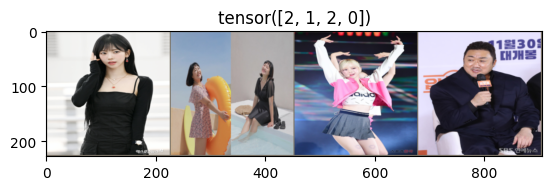

예측결과 : tensor([0, 1, 2, 2], device='cuda:0'), 정답:tensor([0, 1, 2, 2])


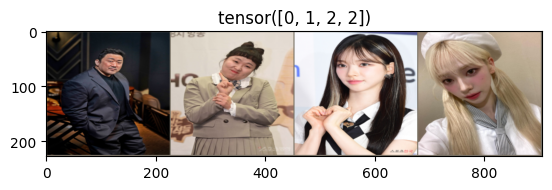

예측결과 : tensor([2, 0, 1, 0], device='cuda:0'), 정답:tensor([2, 0, 1, 0])


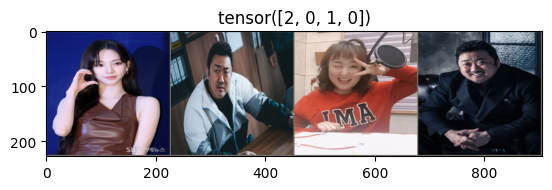

예측결과 : tensor([0, 0, 0, 0], device='cuda:0'), 정답:tensor([1, 1, 0, 0])


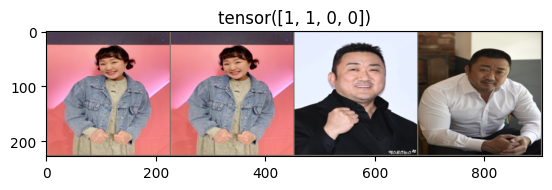

예측결과 : tensor([0, 2, 2, 2], device='cuda:0'), 정답:tensor([0, 2, 2, 2])


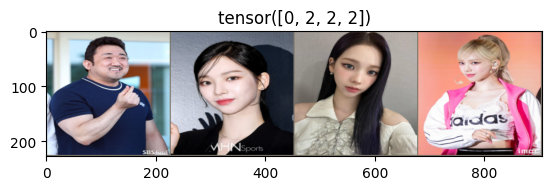

예측결과 : tensor([0, 1, 0, 2], device='cuda:0'), 정답:tensor([0, 1, 0, 2])


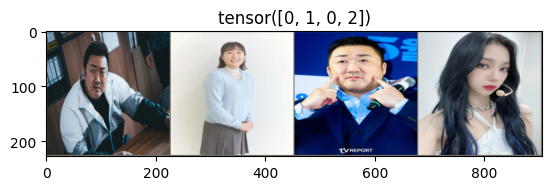

예측결과 : tensor([1, 1, 1, 2], device='cuda:0'), 정답:tensor([1, 1, 1, 2])


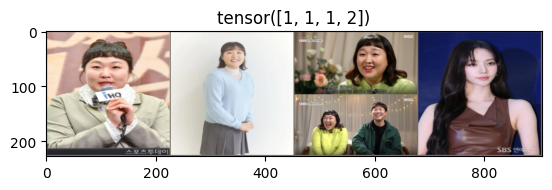

예측결과 : tensor([2, 0, 2, 1], device='cuda:0'), 정답:tensor([2, 0, 2, 1])


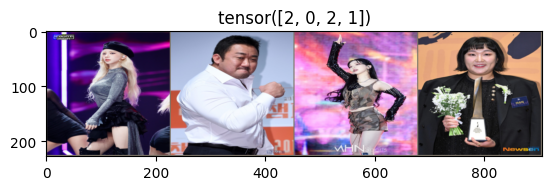

최종 정확도 :  tensor(0.9375, device='cuda:0')


In [17]:
model.eval()
total_pred = 0

with torch.no_grad():
    for data,label in test_dataloader:
        pred = model(data.to(device)) #[ 0.1, 6.3, -0.1]
        pred = torch.max(pred,1)[1] #[0,1,1,2]

        total_pred = total_pred + torch.sum(pred==label.to(device).data)

        print(f'예측결과 : {pred}, 정답:{label}')
        images_data = torchvision.utils.make_grid(data)
        imshow(images_data.to('cpu'),label)

print('최종 정확도 : ', total_pred/len(test_datasets))

In [19]:
from PIL import Image

image = Image.open('./data/images.jpeg')
image = trainsforms_test(image).unsqueeze(0).to(device)

result = model(image)
result

tensor([[-1.8396,  1.5518, -1.1715]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [20]:
torch.save(model.state_dict(), 'mymodel.pth')  # 저장할 때 이것을 제일 많이 사용한다.

In [21]:
torch.save(model, 'my_model1.pth')

In [22]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  